FExcellent_DS_Fund_Capstone_Golf_Data_Test

In [398]:
import sympy as sym
import pylab 
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
%matplotlib inline


In [ ]:
#Stuff is hardcoded and no functions yet. Keep it simple. Do not write stuff that is hard to follow, 
#even if there is a small performance penalty. No recursion. Thank you.

print("\nProcessing Data\n")
#No date or time added to log file yet
log_file = open("err_log1.log", "a")
# master list of shots for all players 
# (per tournament, per year, per player, per round, per hole)
all_rows_of_shots_list = [] 

try:
        #Stuff is hardcoded and no functions yet. Thank you.
        #tournament name lookup
        with open(".\\data\\tourney-lookup.json", 'r') as tour_content:
            tour_data = json.load(tour_content)
        #player name lookup
        df_players = pd.read_json(".\\data\\players.json")
        df_players.set_index('pid')
        d_base_path = ".\\data\\tournaments"
        #Get all tournaments
        all_tournaments = os.listdir(d_base_path)
        for this_tournament in all_tournaments:
            #Stuff is hardcoded and no functions yet. Thank you.
            d_path = ".\\data\\tournaments\\" + this_tournament + "\\2017\\scorecards"
            if not os.path.exists(d_path):
                log_file.write("Failed to find path: {0}\n".format(d_path))
            else:
                #Get all players for this tournament
                all_players = os.listdir(d_path)
                for this_player in all_players:
                    d_file = d_path + "\\" + this_player
                    #Get data for this player
                    with open(d_file) as content_file:
                        header_data_item = "" 
                        # One row of shot data per shot
                        row_of_shot_data_list = []
                        for line in content_file:
                            json_txt = json.loads(line)
                            #Start building row header
                            #Add tournament code to row_of_shot_data
                            row_of_shot_data_list.append(this_tournament)
                            #Add tournament name to row_of_shot_data                            
                            if str(this_tournament) in tour_data.keys():
                                row_of_shot_data_list.append(tour_data[str(this_tournament)])
                            else:
                                row_of_shot_data_list.append("Tournament Name N/A for code " + str(this_tournament))                            
                            #Add tournament year to row_of_shot_data                            
                            row_of_shot_data_list.append('2017')
                            #Add player id, player full name, and player country and  to row_of_shot_data                            
                            for this_header_key in json_txt.get("p"):
                                if this_header_key != "rnds":
                                    if this_header_key != "msgId":
                                        if this_header_key == "id":
                                            player_id = json_txt.get("p")[this_header_key]
                                            row_of_shot_data_list.append(player_id)
                                            if player_id == "":
                                                player_id_int = 0
                                            else:
                                                player_id_int = int(player_id)
                                            df3 = df_players[(df_players['pid'] == player_id_int)]
                                            if df3.shape[0] <= 0:
                                                p_full_name = "Player Full Name N/A for Code " + str(player_id_int)
                                                p_country = "Player Country N/A for Code " + str(player_id_int)
                                                row_of_shot_data_list.append(p_full_name)
                                                row_of_shot_data_list.append(p_country)
                                            else:
                                                p_full_name = str(df3['nameF'].iloc[0]) + " " + str(df3['nameL'].iloc[0])
                                                p_country = str(df3['country'].iloc[0])
                                                row_of_shot_data_list.append(p_full_name)
                                                row_of_shot_data_list.append(p_country)                                                
                                        else:
                                            header_data_item = json_txt.get("p")[this_header_key]
                                            row_of_shot_data_list.append(header_data_item)
                                #Done building row header
                                #Process shot data: Find each round, 
                                #then find each hole for this round,
                                #then find each shot for this hole,
                                #add shot data to row_of_shot_data 
                                #For example,
                                #round 1, hole1, and shot 1
                                #round 1, hole 1, and shot 2
                                #round 1, hole 1, and shot n
                                #       :
                                #       :
                                #       :
                                #round 1, hole18, and shot 1
                                #round 1, hole18, and shot n
                                #       :
                                #       :
                                #       :
                                #round 2, hole n, and shot 1
                                #round 2, hole n, and shot n
                                #       :
                                #       :
                                #       :
                                #round n, hole n, and shot n
                                else:
                                    for this_round in json_txt.get("p")["rnds"]:
                                        for key in this_round:
                                            if key != "holes":
                                                row_of_shot_data_list.append(this_round[key])
                                            else:
                                                for this_hole in this_round["holes"]:
                                                    for key in this_hole:
                                                        if key != "shots":
                                                            row_of_shot_data_list.append(this_hole[key])
                                                        else:
                                                            from_x = ''
                                                            from_y = ''                                                            
                                                            for this_shot in this_hole["shots"]:
                                                                for key in this_shot:
                                                                    if key == 'x':
                                                                        row_of_shot_data_list.append(str(from_x))
                                                                        row_of_shot_data_list.append(this_shot[key])
                                                                        from_x = this_shot[key]
                                                                    elif key == 'y':
                                                                        row_of_shot_data_list.append(str(from_y))
                                                                        row_of_shot_data_list.append(this_shot[key])
                                                                        from_y = this_shot[key]
                                                                    else:
                                                                        row_of_shot_data_list.append(this_shot[key])                                                              
                                                                #Add this row shot for this hole, for this round,
                                                                #for this player, for this year, for this tournament
                                                                #to all_rows_of_shots master list 
                                                                all_rows_of_shots_list.append(row_of_shot_data_list)
                                                                #Prepare row for next shot to be added: remove
                                                                #this shot's data from row, to load next shot
                                                                row_of_shot_data_list = row_of_shot_data_list[0:12]
                                                            #loaded all shots
                                                    #Prepare row for next hole to be added: remove
                                                    #this hole's data from row, to load next hole
                                                    row_of_shot_data_list = row_of_shot_data_list[0:7]
                                                #Loaded all holes
                                        #Prepare row for next round to be added: remove
                                        #this round's data from row, to load next round
                                        row_of_shot_data_list = row_of_shot_data_list[0:6]
                                    #Loaded all rounds
                            #Clear row for next player file
                            row_of_shot_data_list = []
                #Load next player (file)
        #Load next tournament (directory)
except Exception as e:
    log_file.write("Failed to finish processing: {0}\n".format(str(e)))
    print("\nFinished Processing with errors\n") 
finally:
    if not log_file.closed:
        log_file.close()
        
print("\nFinished Processing\n") 
print("\n---Main list has " + str(len(all_rows_of_shots_list)) + " records---\n")

In [ ]:
#Send data to frame for csv output, analysis, etc.
my_cols = ["tournament",
           "tournament_name",
           "year",
           "id",
           "p_full_name",
           "p_country",
           "rnds",
           "holes",
           "cNum",
           "sc",
           "pDay",
           "pTot",
           "shots",
           "pid",
           "time",
           "putt",
           "t",
           "prv",
           "tee",
           "cup",
           "from",
           "to",
           "asc",
           "dist",
           "left",
           "from_x",
           "x",
           "from_y",
           "y",
           "z",
           "club",
           "con",
           "shotText"]

df = pd.DataFrame(all_rows_of_shots_list,columns=my_cols)
#df.set_index("id")
#df.tail()
#print(str(df.shape[0]))
df.to_csv("a_f_e_glf_data.csv", mode='w', index=False)


In [51]:
df2 = pd.read_csv("a_f_e_glf_data_GOOD.csv",low_memory=False)


In [245]:

df4 = df2[(df2['rnds'] > 3) & (df2['holes'] == 1) & (df2['putt'] == 1) & (df2['dist'] > 0)  & (df2['asc'] > 0)]
df5 = df4.set_index(['tournament', 'tournament_name','year','p_full_name','rnds','holes','shots'])
df5.iloc[0:,9:]

t  \
tournament tournament_name                                    year p_full_name        rnds holes shots      
2          CareerBuilder Challenge in partnership with the... 2017 Phil Mickelson     4    1     3      S   
                                                                   Chad Campbell      4    1     3      S   
                                                                   Ryan Armour        4    1     3      S   
                                                                   Ken Duke           4    1     3      S   
                                                                   Greg Owen          4    1     4      S   
                                                                   Steven Alker       4    1     4      S   
                                                                   Chris Evans        4    1     4      S   
                                                                   Charles Howell III 4    1     3      S   
                                                                   Geoff Ogilvy       4    1     4      S   
                                                                   Aaron Baddeley     4    1     3      S   
                                                                   Vaughn Taylor      4    1     4      S   
                                                                   Tag Ridings        4    1     4      S   
                                                                   Rory Sabbatini     4    1     5      S   
                                                                   Bryce Molder       4    1     4      S   
                                                                   Sean O'Hair        4    1     3      S   
                                                                   Robert Garrigus    4    1     3      S   
                                                                   Bill Haas          4    1     3      S   
                                                                   Francesco Molinari 4    1     3      S   
                                                                   D.A. Points        4    1     3      S   
                                                                   Steven Bowditch    4    1     3      S   
                                                                   Tim Wilkinson      4    1     3      S   
                                                                   Paul Casey         4    1     3      S   
                                                                   Kevin Na           4    1     3      S   
                                                                   Nick Taylor        4    1     3      S   
                                                                   Jason Dufner       4    1     3      S   
                                                                   Scott Piercy       4    1     3      S   
                                                                   Lucas Glover       4    1     3      S   
                                                                   Chez Reavie        4    1     3      S   
                                                                   David Hearn        4    1     3      S   
                                                                   Jhonattan Vegas    4    1     3      S   
...                                                                                                    ..   
518        Barbasol Championship                              2017 Kyle Reifers       4    1     4      S   
                                                                   Tyler Aldridge     4    1     4      S   
                                                                   Julian Etulain     4    1     3      S   
                                                                   Scott Stallings    4    1     4      S   
                                                                   Dere

In [305]:
df6 = df2[(df2['rnds'] == 3) & (df2['putt'] == 1) & (df2['left'] == 0) & (df2['p_full_name'] == 'Phil Mickelson')]
df7 = df6.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])
df7.shape[0]
df8 = df7.iloc[0:,17:23]
df8


dist  \
tournament_name                                    year p_full_name    rnds holes shots         
CareerBuilder Challenge in partnership with the... 2017 Phil Mickelson 3    3     4        36   
                                                                            4     3        60   
                                                                            6     3        23   
                                                                            7     4        75   
                                                                            11    4       185   
                                                                            12    4        27   
                                                                            13    3       203   
                                                                            15    4        43   
                                                                            16    4       110   
Waste Management Phoenix Open                      2017 Phil Mickelson 3    1     3        63   
                                                                            3     5        21   
                                                                            5     4       141   
                                                                            7     2       316   
                                                                            8     3       128   
                                                                            10    3        85   
                                                                            13    4        10   
                                                                            14    4        45   
                                                                            15    4        15   
                                                                            17    3        32   
Farmers Insurance Open                             2017 Phil Mickelson 3    4     4       103   
                                                                            5     4        27   
                                                                            6     3        68   
                                                                            7     3        56   
                                                                            10    3       157   
                                                                            12    2       250   
                                                                            13    4        21   
                                                                            17    3        54   
AT&T Pebble Beach Pro-Am                           2017 Phil Mickelson 3    4     3       208   
                                                                            9     4        62   
                                                                            14    4       104   
...                                                                                       ...   
World Golf Championships-Cadillac Championship     2017 Phil Mickelson 3    13    3        55   
                                                                            15    4       106   
                                                                            16    3       121   
                                                                            17    2        44   
World Golf Championships-Bridgestone Invitational  2017 Phil Mickelson 3    1     5        55   
                                                                            10    4        51   
                                                                            12    3        26   
                                                                            14    4        48   
                                                                            16    4        42   
               

In [321]:

sym.init_printing()
x,y = sym.symbols('x,y')


putt1_x = 9603.239
putt1_y = 9821.065
putt1_d = 34

putt2_x = 9851.398
putt2_y = 10423.161
putt2_d = 21

f = sym.Eq(((putt1_x - x)**2 + (putt1_y - y)**2)**.5 - putt1_d)
g = sym.Eq(((putt2_x - x)**2 + (putt2_y - y)**2)**.5 - putt2_d)

sym.solve([f,g],(x,y))

# x1 = 9727.52768727468−299.91266085854𝑖
# y1 = 10122.6205408159+123.611560292701𝑖

# x2 = 9727.52768727468+299.91266085854𝑖
# y2 = 10122.6205408159−123.611560292701𝑖

In [324]:
holex_complex = complex(9727.52768727468,299.91266085854)
holey_complex = complex(10122.6205408159,123.611560292701)

r_check = ((putt1_x - holex_complex)**2 + (putt1_y - holey_complex)**2)
dist_check = putt1_d - (r_check.real)**.5
dist_check
# dist_check = 1.851105935202213𝑒−10

In [325]:

holex = holex_complex.real
holey = holey_complex.real
#Hole 3 coordinates: (9727.52768727468, 10122.6205408159)
print("Hole 3 coordinates: (" + str(holex) + ", " + str(holey) + ")")


Hole 3 coordinates: (9727.52768727468, 10122.6205408159)


In [326]:
df9 = (df2[(df2['tournament'] == 2) & (df2['holes'] == 3) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df10 = df9.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])

df11 = df10.iloc[0:,17:23]
df11.iloc[0:,2:3] =(df11.iloc[0:,2] - holex)
df11.iloc[0:,4:5] = (df11.iloc[0:,4] - holey)

#230 rows × 6 columns
df11


dist  \
tournament_name                                    year p_full_name                         rnds holes shots         
CareerBuilder Challenge in partnership with the... 2017 Mark Brooks                         1    3     4         7   
                                                        Bob Estes                           1    3     5        40   
                                                        Phil Mickelson                      3    3     4        36   
                                                                                            4    3     4        18   
                                                        Jerry Kelly                         3    3     4        20   
                                                        Chad Campbell                       2    3     4        13   
                                                                                            4    3     4        38   
                                                        Charley Hoffman                     3    3     4        40   
                                                        Ryan Armour                         1    3     3        95   
                                                                                            4    3     4         2   
                                                        Brian Gay                           3    3     4        31   
                                                        Ken Duke                            3    3     4        19   
                                                                                            4    3     4        23   
                                                        Stewart Cink                        3    3     4        11   
                                                        Alex Cejka                          2    3     4        24   
                                                        John Senden                         2    3     4        28   
                                                        Greg Owen                           3    3     3       164   
                                                                                            4    3     4        40   
                                                        Steven Alker                        2    3     3       146   
                                                                                            4    3     5        23   
                                                        Angel Cabrera                       2    3     5        18   
                                                        Chris Evans                         1    3     3       199   
                                                                                            4    3     4        37   
                                                        Mark Wilson                         3    3     4        49   
                                                        Charles Howell III                  1    3     4        83   
                                                                                            4    3     4        12   
                                                        Geoff Ogilvy                        2    3     4         5   
                                                                                            4    3     4        19   
                                                        Cameron Percy                       2    3     4         7   
                                                        Aaron Baddeley                      1    3     4        19   
...                                                                                                            ...   
                                                        Dominic Bozzelli                    1    3     4        54   
                                                                                            4    3

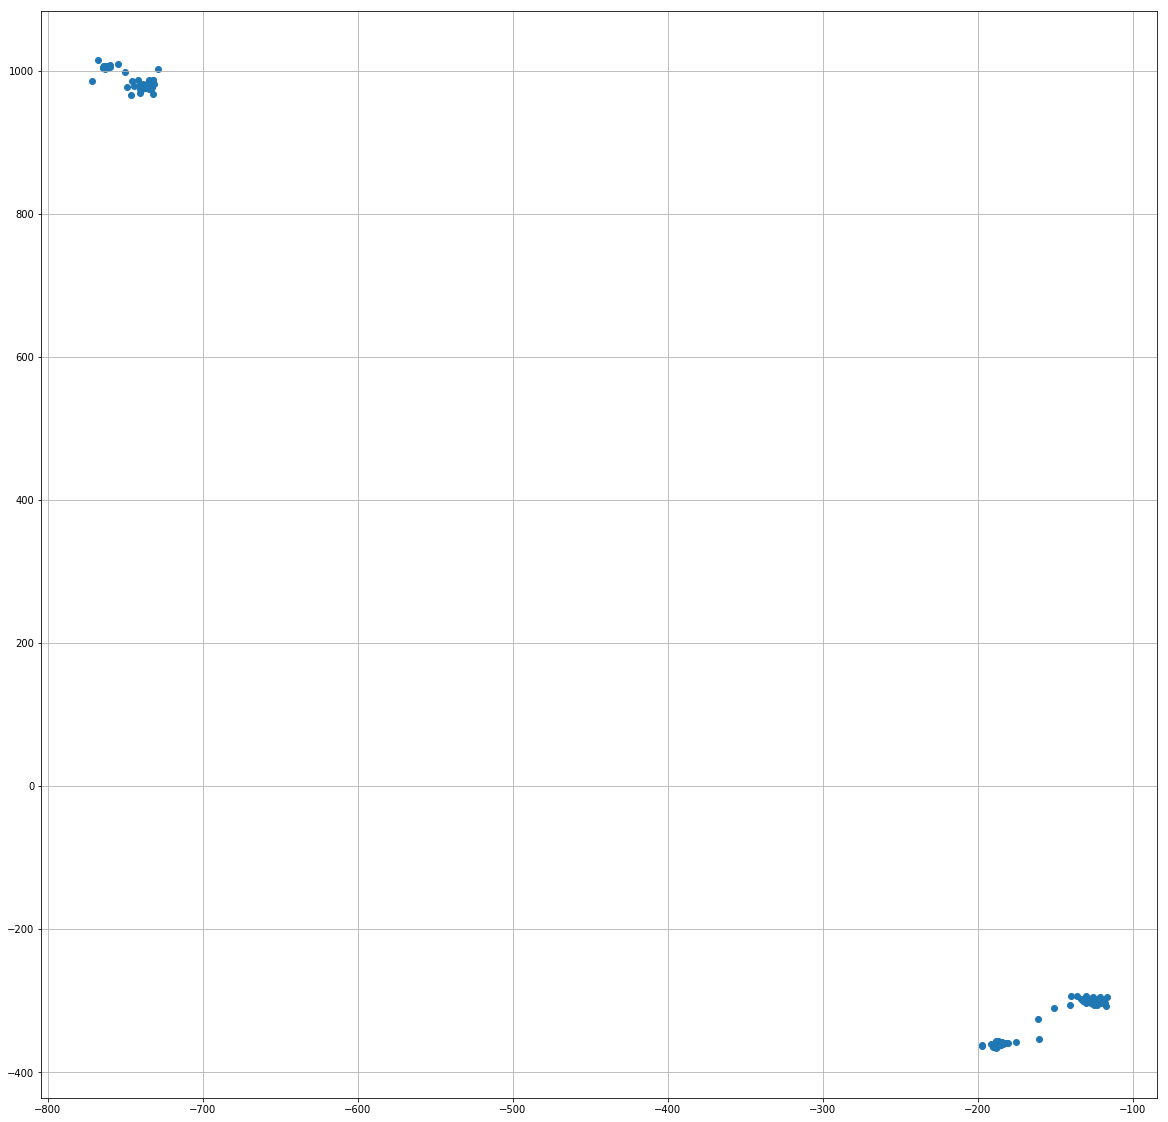

In [327]:

vx = np.array(df11.iloc[0:,2])
vy = np.array(df11.iloc[0:,4])

p_scatter_all = plt
p_scatter_all.figure(figsize=(20,20))
p_scatter_all.grid()
p_scatter_all.scatter(vx, vy)

#Shows two main groups of golfers.


In [339]:

df12 = (df2[(df2['tournament'] == 2) & (df2['holes'] == 3) & (df2['putt'] > 0) & (df2['dist'] > 0) & (df2['left'] == 0)])
df13 = df12.set_index(['tournament_name','year','p_full_name','rnds','holes','shots'])
Putters_total = df13.shape[0]
df14 = df13.iloc[0:,17:23]
df14.iloc[0:,2:3] = (df14.iloc[0:,2] - holex)
df14.iloc[0:,4:5] = (df14.iloc[0:,4] - holey)

df_hopefuls = df14[(df14['from_x'].real <= -700)]
df_pros = df14[(df14['from_x'].real > -700)]
g_hopefuls_count = df_hopefuls.shape[0]
g_pros_count = df_pros.shape[0]

#Hopeful putters on hole 3: 113, Pro golfers on hole 3: 117, Total putters on hole 3: 230
print("Hopeful putters on hole 3: " + str(g_hopefuls_count) + ", "  + "Pro golfers on hole 3: " + str(g_pros_count) 
      + ", "  + "Total putters on hole 3: " + str(Putters_total))
        

Hopeful putters on hole 3: 113, Pro golfers on hole 3: 117, Total putters on hole 3: 230


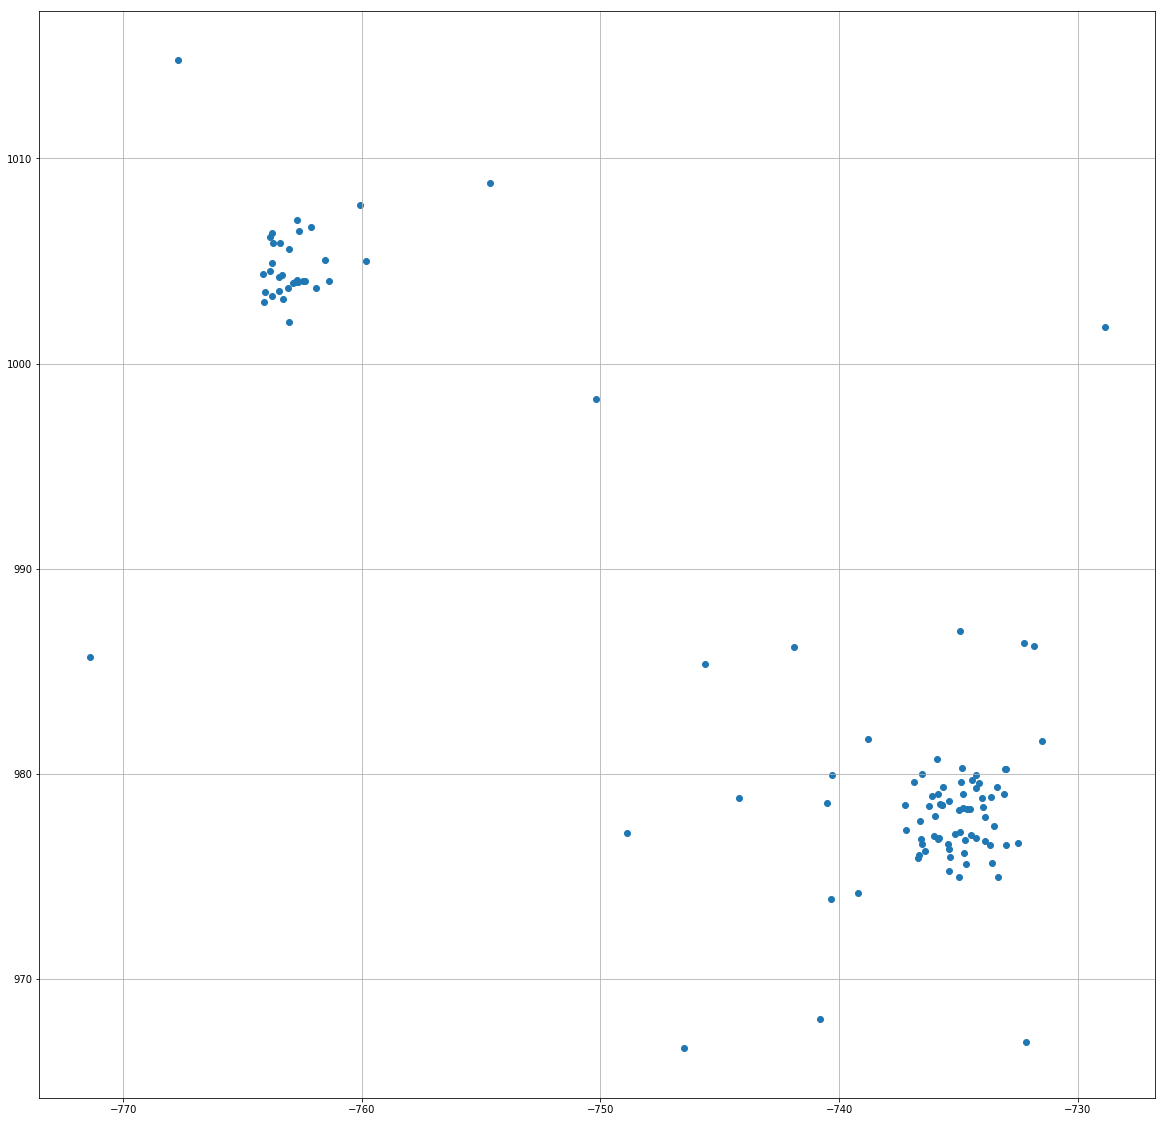

In [340]:

vx_hopefuls = np.array(df_hopefuls.iloc[0:,2])
vy_hopefuls = np.array(df_hopefuls.iloc[0:,4])

p_scatter_hopefuls = plt
p_scatter_hopefuls.figure(figsize=(20,20))
p_scatter_hopefuls.grid()
p_scatter_hopefuls.scatter(vx_hopefuls, vy_hopefuls)

#Shows two main groups of hopeful golfers.

In [341]:
df_hopefuls_group1 = df14[((df14['from_x'].real > -750) & (df14['from_x'].real <= -700)) & ((df14['from_y'].real > 960) & (df14['from_y'].real <= 1010))]
df_hopefuls_group2 = df14[((df14['from_x'].real > -780) & (df14['from_x'].real <= -750)) & ((df14['from_y'].real > 980) & (df14['from_y'].real <= 1020))]

df_hopefuls_group1_count = df_hopefuls_group1.shape[0]
df_hopefuls_group2_count = df_hopefuls_group2.shape[0]
df_hopefuls_selected_total = df_hopefuls_group1_count + df_hopefuls_group2_count

#Group1 of hopeful putters on hole 3: 78, Group2 of hopeful putters on hole 3: 35, Selected hopeful putters on hole 3: 113
print("Group1 of hopeful putters on hole 3: " + str(df_hopefuls_group1_count) + ", "  + "Group2 of hopeful putters on hole 3: " + str(df_hopefuls_group2_count) 
      + ", "  + "Selected hopeful putters on hole 3: " + str(df_hopefuls_selected_total))

Group1 of hopeful putters on hole 3: 78, Group2 of hopeful putters on hole 3: 35, Selected hopeful putters on hole 3: 113


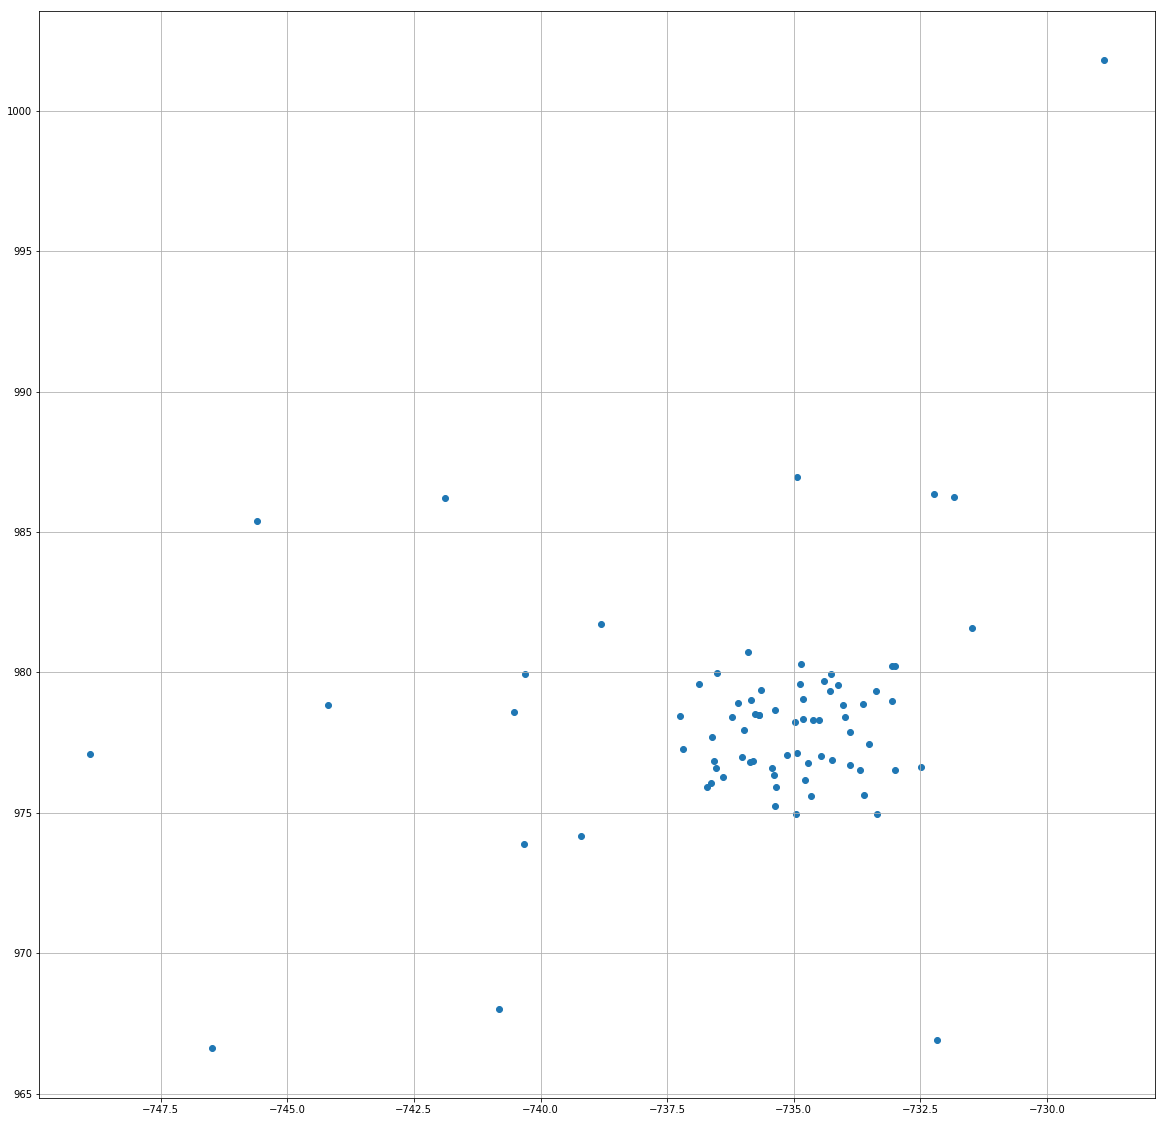

In [342]:

vx_hopefuls_group1 = np.array(df_hopefuls_group1.iloc[0:,2])
vy_hopefuls_group1 = np.array(df_hopefuls_group1.iloc[0:,4])

p_scatter_hopefuls_group1 = plt
p_scatter_hopefuls_group1.figure(figsize=(20,20))
p_scatter_hopefuls_group1.grid()
p_scatter_hopefuls_group1.scatter(vx_hopefuls_group1, vy_hopefuls_group1)

#Displays group1 of hopeful golfers.

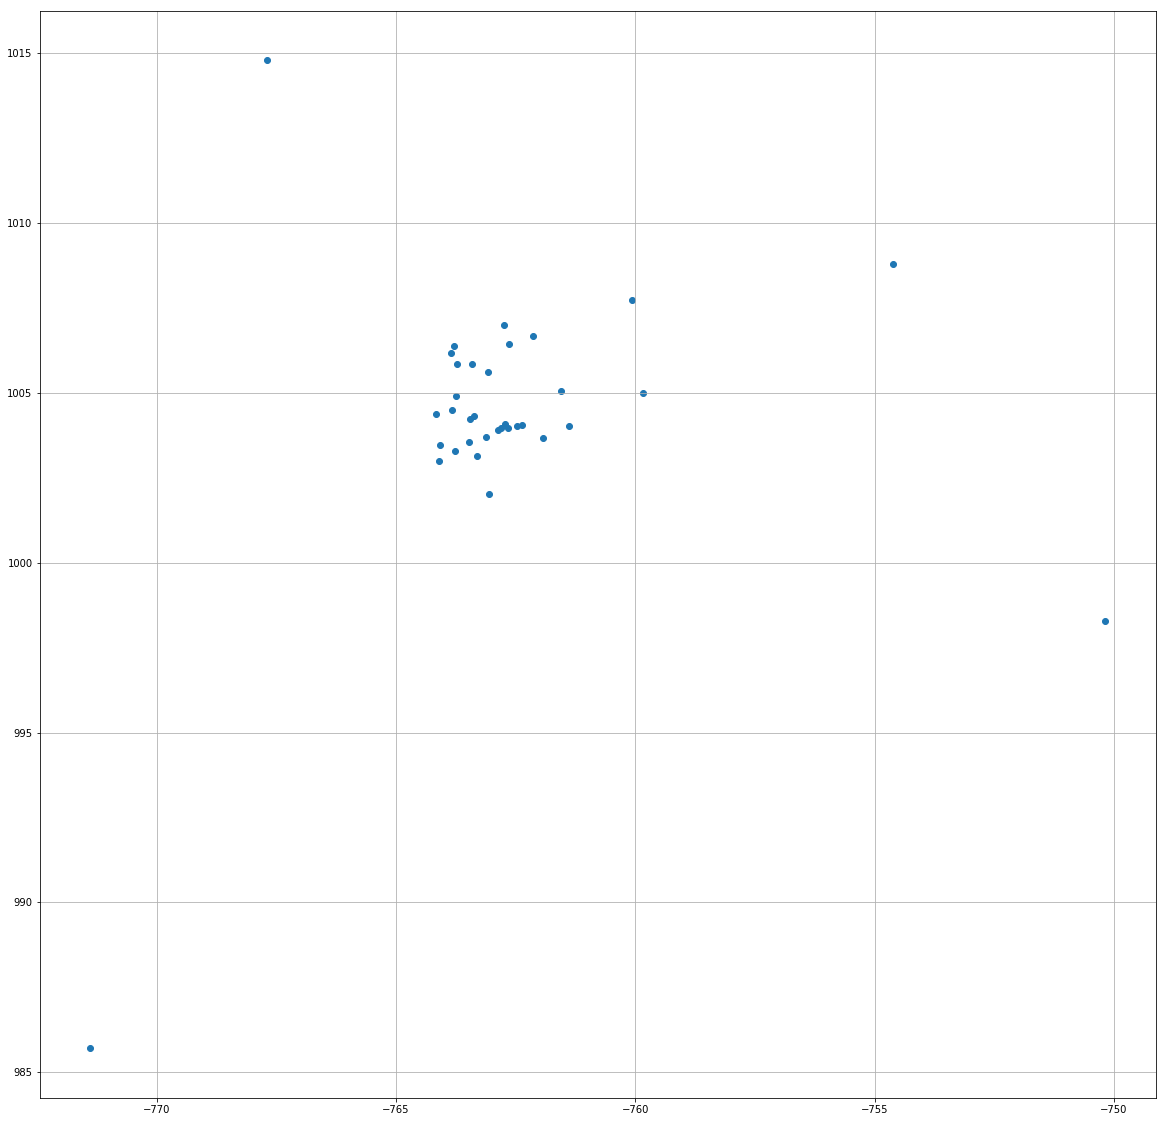

In [343]:
vx_hopefuls_group2 = np.array(df_hopefuls_group2.iloc[0:,2])
vy_hopefuls_group2 = np.array(df_hopefuls_group2.iloc[0:,4])

p_scatter_hopefuls_group2 = plt
p_scatter_hopefuls_group2.figure(figsize=(20,20))
p_scatter_hopefuls_group2.grid()
p_scatter_hopefuls_group2.scatter(vx_hopefuls_group2, vy_hopefuls_group2)

#Displays group2 of hopeful golfers.

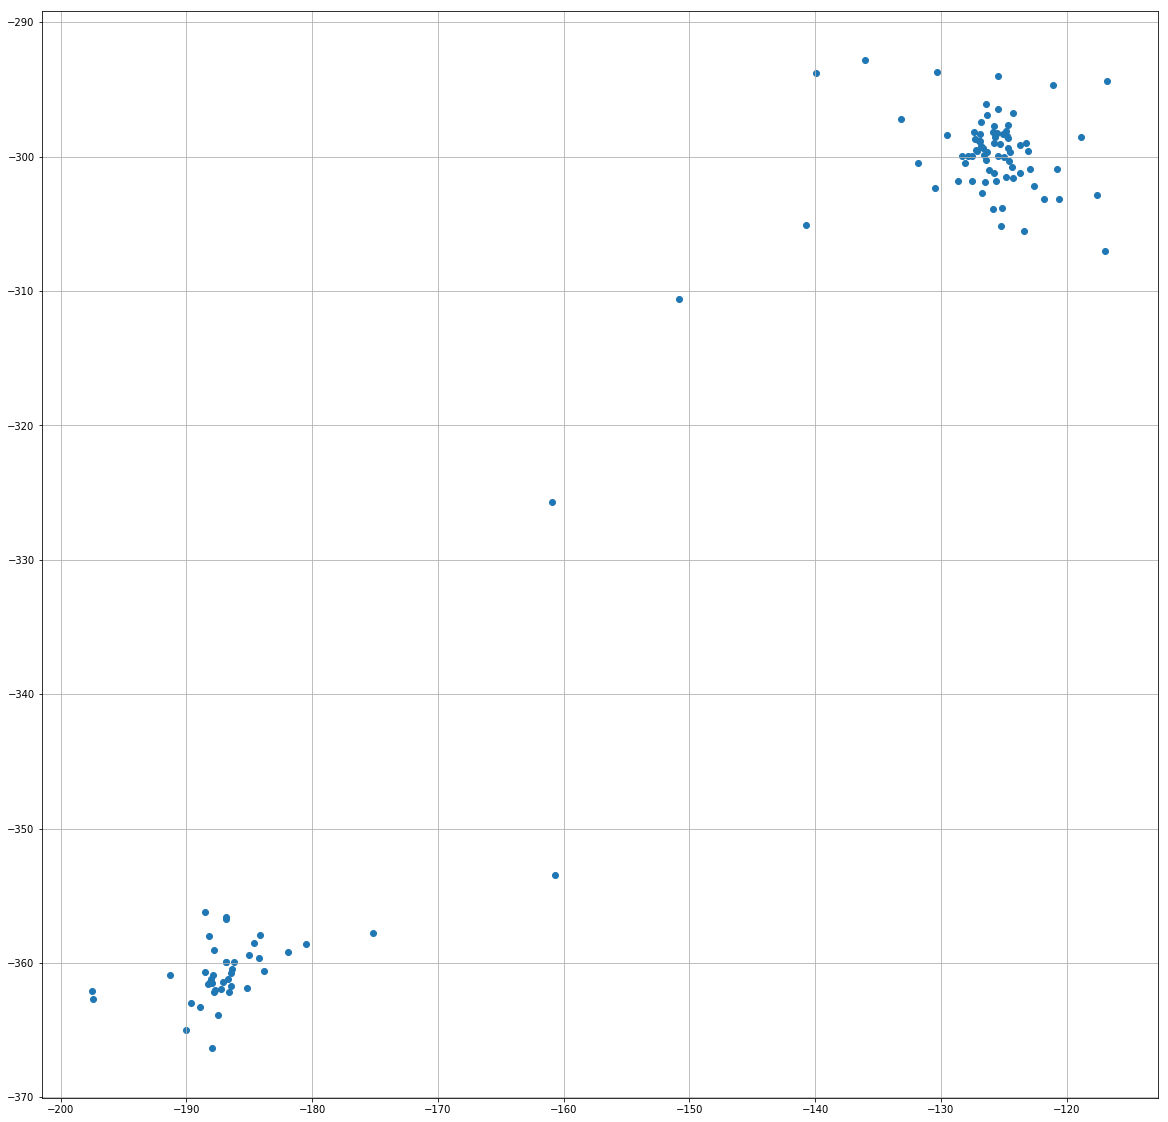

In [344]:
vx_pros = np.array(df_pros.iloc[0:,2])
vy_pros = np.array(df_pros.iloc[0:,4])

p_scatter_pros = plt
p_scatter_pros.figure(figsize=(20,20))
p_scatter_pros.grid()
p_scatter_pros.scatter(vx_pros, vy_pros)

#Displays two groups of pro golfers.

In [345]:
df_pros_group1 = df14[((df14['from_x'].real > -160) & (df14['from_x'].real <= 0)) & ((df14['from_y'].real > -320) & (df14['from_y'].real <= -290))]
df_pros_group2 = df14[((df14['from_x'].real > -200) & (df14['from_x'].real <= -160)) & ((df14['from_y'].real > -370) & (df14['from_y'].real <= -320))]

df_pros_group1_count = df_pros_group1.shape[0]
df_pros_group2_count = df_pros_group2.shape[0]
df_pros_selected_total = df_pros_group1_count + df_pros_group2_count
#Group1 of pro putters on hole 3: 75, Group2 of pro putters on hole 3: 42, Selected pro putters on hole 3: 117
print("Group1 of pro putters on hole 3: " + str(df_pros_group1_count) + ", "  + "Group2 of pro putters on hole 3: " + str(df_pros_group2_count) 
      + ", "  + "Selected pro putters on hole 3: " + str(df_pros_selected_total))

Group1 of pro putters on hole 3: 75, Group2 of pro putters on hole 3: 42, Selected pro putters on hole 3: 117


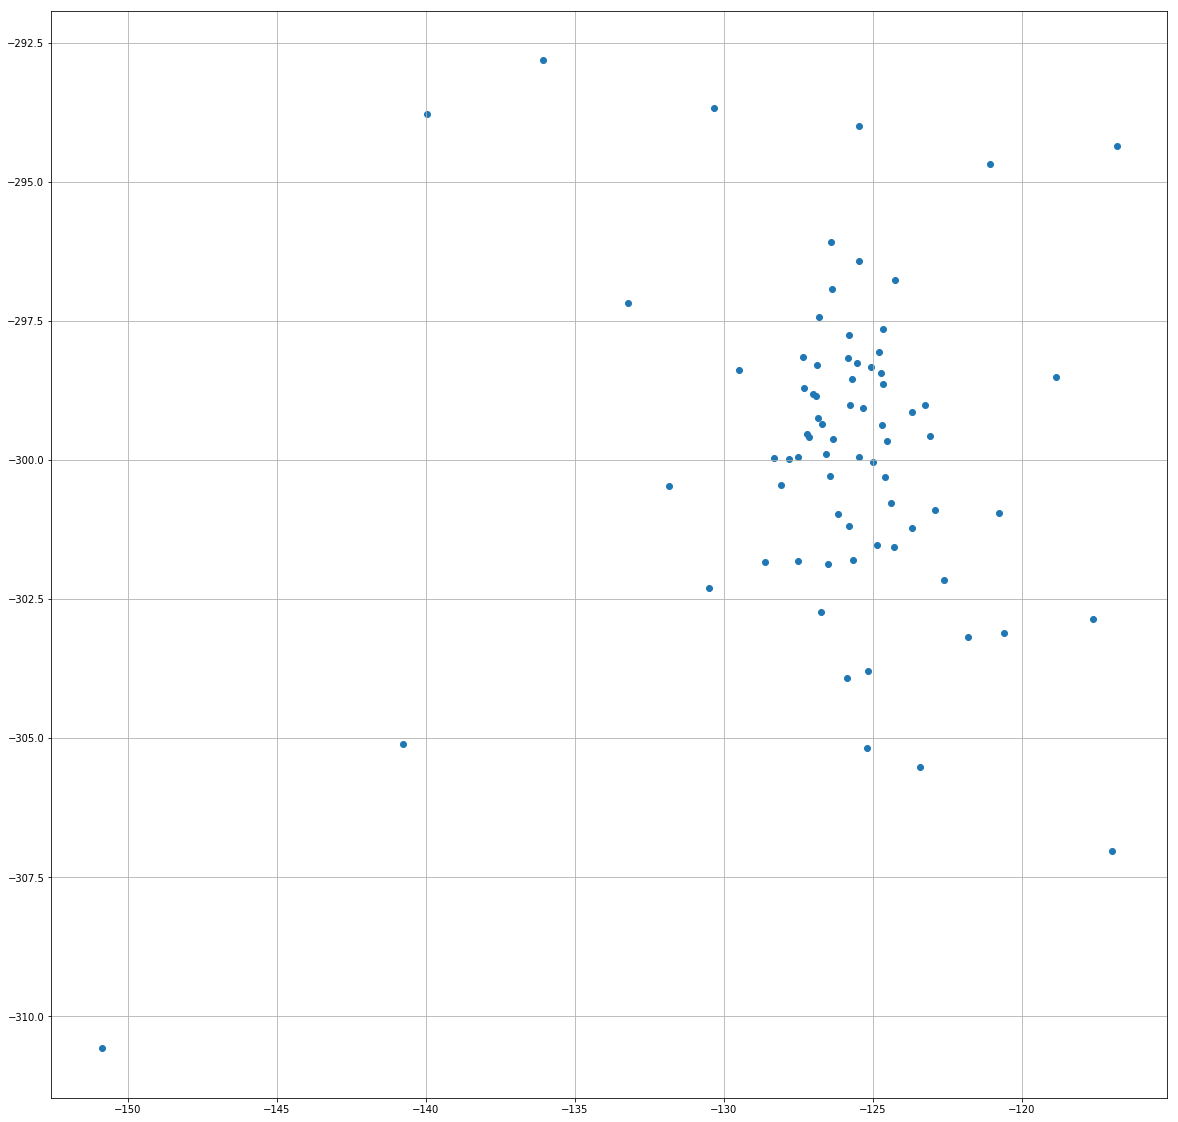

In [346]:
vx_pros_group1 = np.array(df_pros_group1.iloc[0:,2])
vy_pros_group1 = np.array(df_pros_group1.iloc[0:,4])

p_scatter_pros_group1 = plt
p_scatter_pros_group1.figure(figsize=(20,20))
p_scatter_pros_group1.grid()
p_scatter_pros_group1.scatter(vx_pros_group1, vy_pros_group1)

#Displays Group 1 of pro golfers.

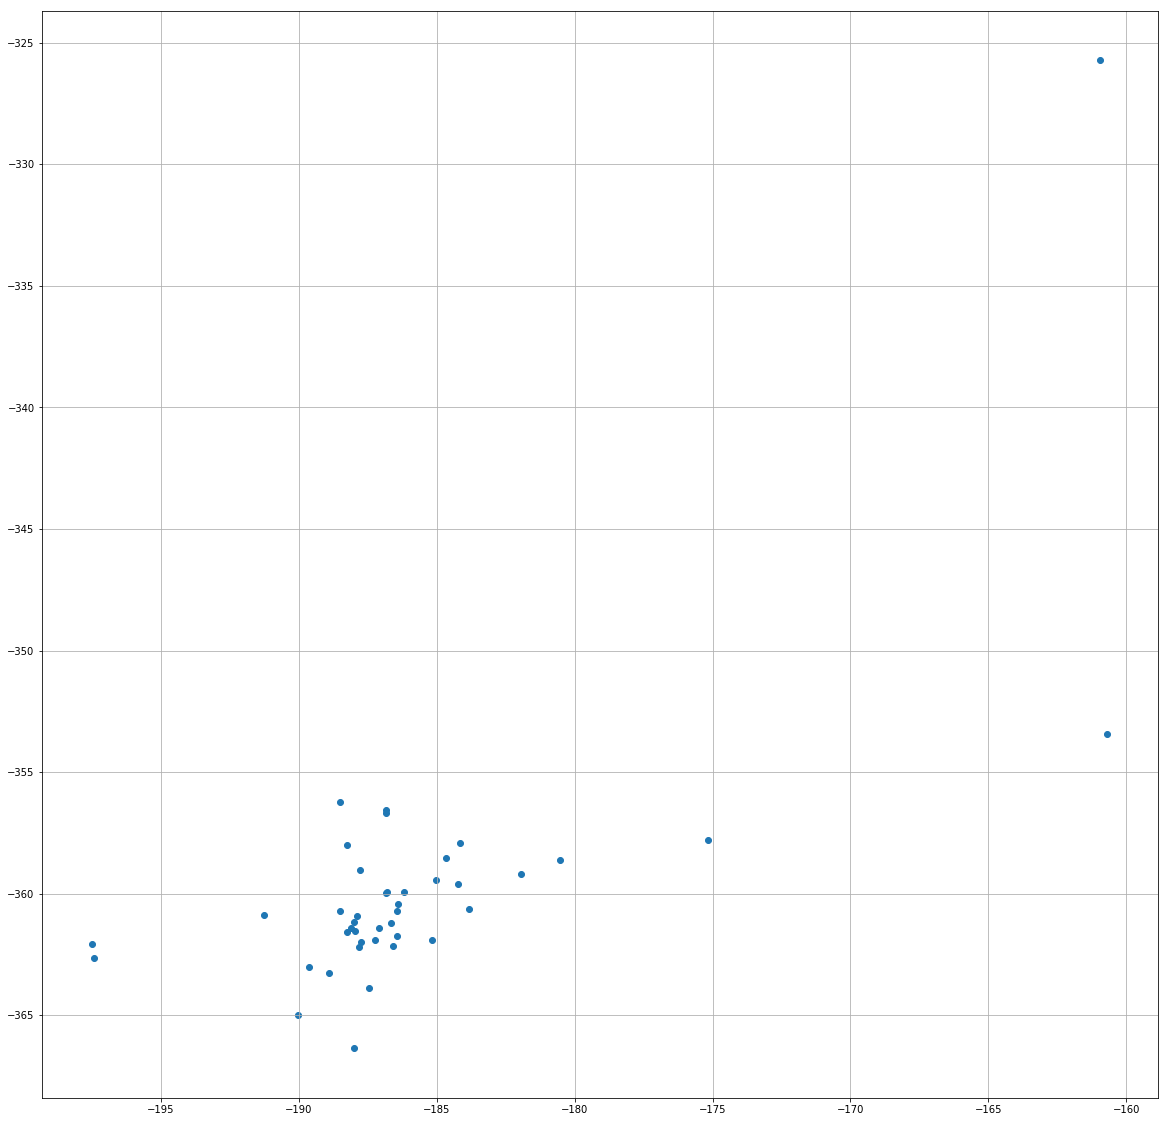

In [347]:
vx_pros_group2 = np.array(df_pros_group2.iloc[0:,2])
vy_pros_group2 = np.array(df_pros_group2.iloc[0:,4])

p_scatter_pros_group2 = plt
p_scatter_pros_group2.figure(figsize=(20,20))
p_scatter_pros_group2.grid()
p_scatter_pros_group2.scatter(vx_pros_group2, vy_pros_group2)

#Displays Group 2 of pro golfers.

In [348]:
df2.columns

Index(['tournament', 'tournament_name', 'year', 'id', 'p_full_name',
       'p_country', 'rnds', 'holes', 'cNum', 'sc', 'pDay', 'pTot', 'shots',
       'pid', 'time', 'putt', 't', 'prv', 'tee', 'cup', 'from', 'to', 'asc',
       'dist', 'left', 'from_x', 'x', 'from_y', 'y', 'z', 'club', 'con',
       'shotText'],
      dtype='object')

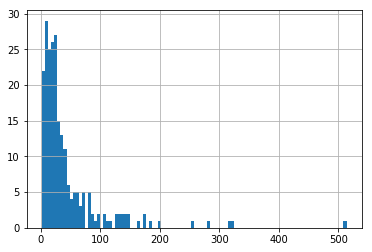

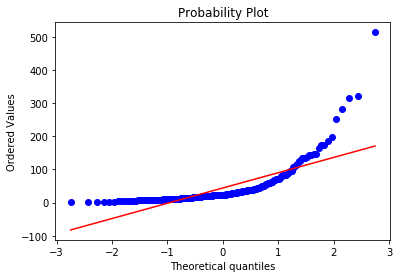

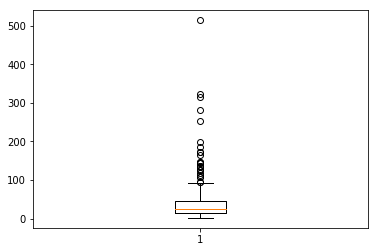

In [407]:

f = plt.figure(1)
df11.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df11.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df11.iloc[0:,0])
plt.show()

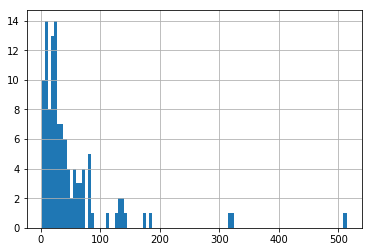

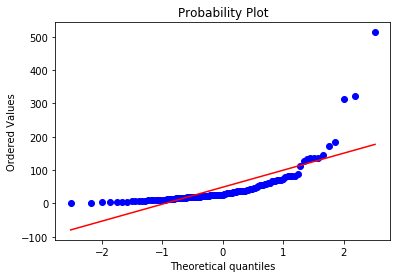

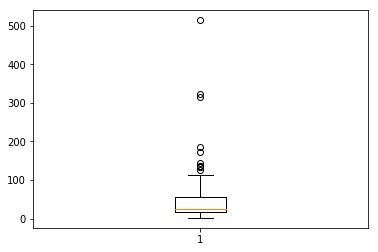

In [413]:
f = plt.figure(1)
df_pros.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_pros.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_pros.iloc[0:,0])
plt.show()

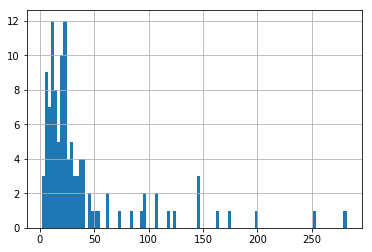

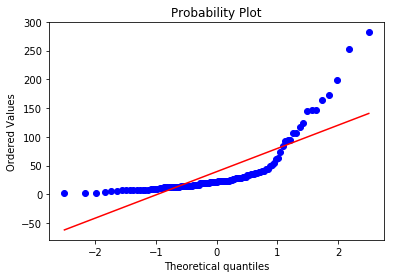

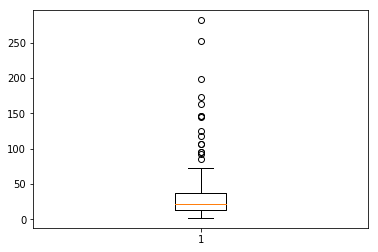

In [408]:

f = plt.figure(1)
df_hopefuls.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_hopefuls.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_hopefuls.iloc[0:,0])
plt.show()

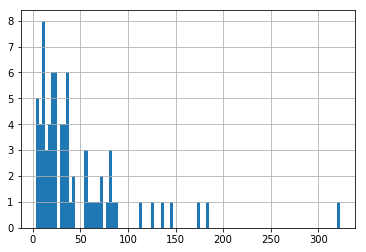

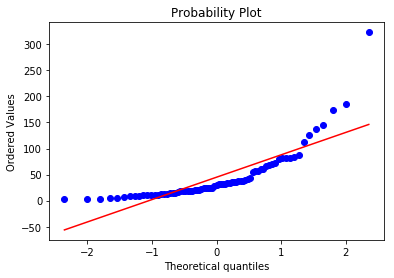

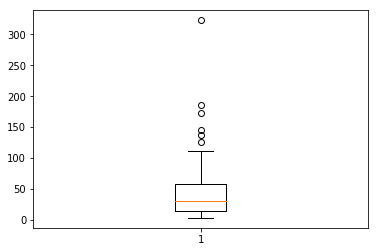

In [411]:

f = plt.figure(1)
df_pros_group1.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_pros_group1.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_pros_group1.iloc[0:,0])
plt.show()

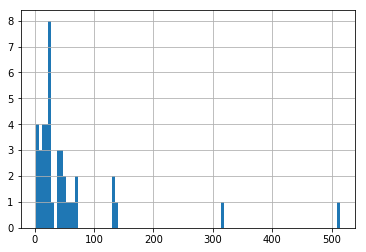

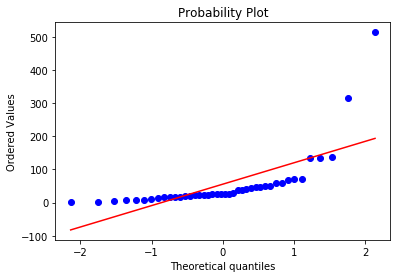

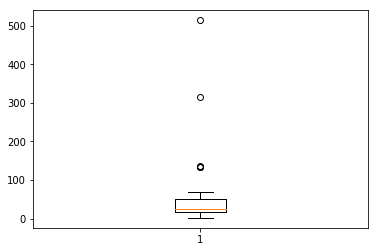

In [412]:
f = plt.figure(1)
df_pros_group2.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_pros_group2.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_pros_group2.iloc[0:,0])
plt.show()

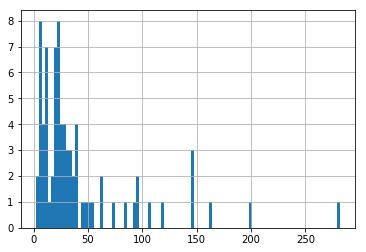

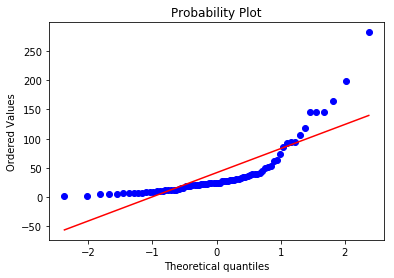

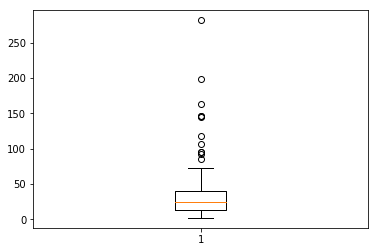

In [405]:
f = plt.figure(1)
df_hopefuls_group1.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_hopefuls_group1.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_hopefuls_group1.iloc[0:,0])
plt.show()

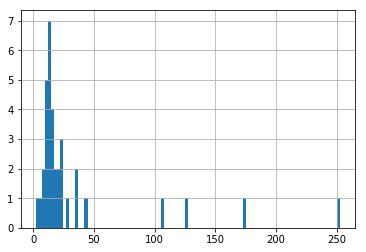

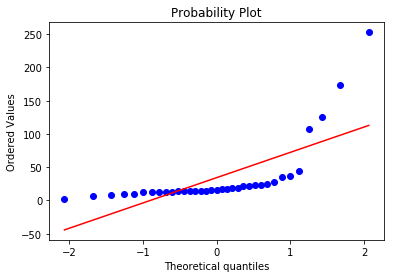

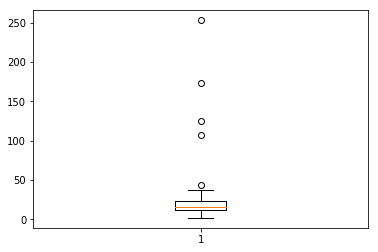

In [404]:
f = plt.figure(1)
df_hopefuls_group2.iloc[0:,0].hist(bins=100)
f = plt.figure(2)
stats.probplot(df_hopefuls_group2.iloc[0:,0], dist="norm", plot=pylab)
pylab.show()
f = plt.figure(3)
plt.boxplot(df_hopefuls_group2.iloc[0:,0])
plt.show()

